# **Reinforcement Learning: Final Project**
### Elain Balderas, Nina McClure, Nicole Poynarova

In this project, we implement the **Proximate Policy Optimization (PPO) algorithm** on the Atari game "Space Invaders". We experiment on a Convolutional Neural Network (CNN), and we vary the hyperparameters of the CNN. We then plot the mean episode reward and loss function as the number of time steps increase.

#### **Set up**

In [1]:
!pip install "gym[accept-rom-license, atari]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Install required modules
!pip install "stable_baselines3[extra]>=2.0.0a9"
!pip install tensorboard
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]
!pip install "gym[accept-rom-license, atari]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached AutoROM-0.6.1-py3-none-any.whl (9.4 kB)
  Using cached ale_py-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.7.5
    Uninstalling ale-py-0.7.5:
      Successfully uninstalled ale-py-0.7.5
  Attempting uninstall: autorom
    Found existing installation: AutoROM 0.4.2
    Uninstalling AutoROM-0.4.2:
      Successfully uninstalled AutoROM-0.4.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
  Attempting uninstall: autorom
    Found existing installation: AutoROM 0.6.1
    Uninstal

In [4]:
### Mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [6]:
!pip install gymnasium
#/content/drive/MyDrive/ppo_cnn_log/PPO_CNN_space_invaders_128_0.1_0.99_1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gymnasium-0.28.1-py3-none-any.whl (925 kB)
  Using cached jax_jumpy-1.0.0-py3-none-any.whl (20 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)


In [5]:
### Import modules
import gym
import gymnasium
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.evaluation import evaluate_policy
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import base64
from pathlib import Path
from IPython import display as ipythondisplay
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from ale_py import ALEInterface


/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11


#### **Space Invaders**

**Game objective**: Destroy the space invaders by shooting your laser cannon at them before they reach the Earth. The game ends when all your lives are lost after taking enemy fire, or when they reach the earth.


**Properties of the game**:

*Action space*: a discrete action space with 6 possible actions:

*   Action 0: NOOP (No operation) - The agent does nothing
*   Action 1: FIRE - The agent fires a missile.
*   Action 2: RIGHT - The agent moves the spaceship to the right.
*   Action 3: LEFT - The agent moves the spaceship to the left.
*   Action 4: RIGHTFIRE - The agent moves the spaceship to the right and fires a missile simultaneously.
*   Action 5: LEFTFIRE - The agent moves the spaceship to the left and fires a missile simultaneously.

*Rewards*: You gain points for destroying space invaders. The invaders in the back rows are worth more points. The space invaders are worth 5, 10, 15, 20, 25, 30 points in the first through sixth rows respectively.


Documentation: https://atariage.com/manual_html_page.php?SoftwareLabelID=460


In [5]:
### Create Space Invaders environment
env = make_atari_env("ALE/SpaceInvaders-v5")

## Proximal Policy Optimization (PPO)

Here we use the **Proximal Policy Optimization (PPO)** algorithm.

PPO uses 'clipping' to avoid policy updates that are "too large". Why? A large step in a policy update can lead to instability and result in falling “off the cliff” (getting a bad policy) and taking a long time to recover from the bad policy.

PPO is an on-policy method. The data collected during training is used only for a single iteration of policy update. The agent interacts with the environment, collects data and uses this data to update its policy. The collected data is then discarded, and the process is repeated to collect new data for the next policy update.


**High-level description of the algorithm steps:**

1)  Initialize the policy network and value parameters

2)  Generate a trajectory given the current policy

3)  Compute "advantages": Estimate the "advantages" of each state-action pair in the generated trajectory. (The advantage estimator estimates how much better/worse an action is compared to the average action taken from a given state. It helps in updating the policy towards more rewarding actions.)

4) Define the policy improvement objective function, applying "clipping" to the importance weights. (Importance weights: These weights capture how much the action probabilities (for a given state) have changed between the old and new policies.). Clipping prevents overly large policy updates.

5) Compute the policy gradient and update the policy network's weights via SGD

6) Update the value paramters via TD($λ$)

7) Repeat steps 2) to 6) until convergence.




**PPO parameters:**

*   *policy*: The policy model to use. (We use a convolutional neural network)
*   

In [ ]:
### Train model

# Where to store training log
log_dir = 'atari_train_log'

# Instantiate model
model = PPO(policy = 'CnnPolicy', env=env, verbose=1, tensorboard_log = log_dir)

# Train
model.learn(total_timesteps= 500000, progress_bar = True)
model.save("ppo_model_500k")

In [ ]:
### Load the TensorBoard event files

event_file = log_dir + '/PPO_3'
event_acc = EventAccumulator(event_file)
event_acc.Reload()

# Get the list of available tags (summary keys)
#tags = event_acc.Tags()

# Retrieve the training episode rewards from the event files
episode_rewards = event_acc.Scalars('rollout/ep_rew_mean') # mean episode rewards
step = [episode.step for episode in episode_rewards]
reward = [episode.value for episode in episode_rewards]

In [ ]:
### Plot the learning curve
plt.plot(step, reward)
plt.title('Learning Curve')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

In [ ]:
#model = model.load("/content/drive/MyDrive/data/ppo_model1")

In [ ]:
### Functions to record video
def show_videos(video_path="", prefix=""):
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))


def record_video(vec_env, model,fps, video_length=500, prefix="", video_folder="videos/"):
   # Start the video at step=0 and record 500 steps
    vec_env.metadata["render_fps"] = fps
    vec_env = VecVideoRecorder(
        vec_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix
    )

    obs = vec_env.reset()
    for _ in range(video_length):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = vec_env.step(action)

    # Close the video recorder
    vec_env.close()

In [ ]:
record_video(env, model,fps = 20, video_length=1000, prefix="ppo-1")
show_videos("videos", prefix="ppo-1")

In [ ]:
# # Load trained model
# env = make_atari_env("ALE/SpaceInvaders-v5")
# #model = PPO.load("ppo_model1")
# model = PPO('CnnPolicy', env)

# # Reset the environment and get the initial observation
# obs = env.reset()

# done = False
# total_reward = 0

# while not done:
#     # Get the action from the model
#     action, _ = model.predict(obs)

#     # Take the action in the environment
#     obs, reward, done, info = env.step(action)
#     print(reward)

#     # Accumulate the reward
#     total_reward += reward

# # Print the score
# print("Score:", total_reward)


In [ ]:
env = make_atari_env("ALE/SpaceInvaders-v5")
#model = PPO.load("ppo_model1") # trained model
model = PPO('CnnPolicy',env) # untrained model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100, warn=False)

print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

## Experiment: Varying hyperparameters



In this section, we vary the hyperparameters and evaluate the mean episode reward and loss as the number of time_steps increase. In particular, we vary the

*   `batch_size` : number of samples used in each update step of the PPO algorithm.
*   `clip_range`: limit the size of the policy update.
* `gamma`: Discount factor.



In [7]:
### Training PPO model with CNN policy, for varied hyperparameters

hyperparameters = {
    'batch_size': [128, 256],
    'clip_range' : [0.1, 0.2, 0.3],
    'gamma' : [0.99, 0.9]
}

cnn_rewards = {}

env = make_atari_env("ALE/SpaceInvaders-v5")

log_dir = 'ppo_cnn_log'

total_iterations = len(hyperparameters['batch_size']) * len(hyperparameters['clip_range']) * len(hyperparameters['gamma'])
iteration = 0

with tqdm(total=total_iterations, desc="Progress") as pbar:
    for batch_size in hyperparameters['batch_size']:
        for clip_range in hyperparameters['clip_range']:
            for gamma in hyperparameters['gamma']:
                iteration += 1

                # Instantiate and train PPO model with CNN policy.
                model = PPO("CnnPolicy", env=env, verbose=1, batch_size=batch_size, clip_range=clip_range, gamma=gamma, tensorboard_log=log_dir)

                # Model training.
                total_timesteps = 100000
                model.learn(total_timesteps=total_timesteps, tb_log_name=f"PPO_CNN_space_invaders_{batch_size}_{clip_range}_{gamma}")
                model.save(f"PPO_CNN_model_{batch_size}_{clip_range}_{gamma}") # saving the model.

                # Evaluate the trained model.
                mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)
                print(f"Algorithm: PPO (CNN), Hyperparameters: batch_size={batch_size}, clip_range={clip_range}, gamma={gamma}")
                print(f"Mean reward: {mean_reward:.2f}")

                # Load the TensorBoard event files for CNN
                event_file = log_dir + f"/PPO_CNN_space_invaders_{batch_size}_{clip_range}_{gamma}_1"
                event_acc = EventAccumulator(event_file)
                event_acc.Reload()

                # Retrieve the training episode rewards from the event files for CNN.
                episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
                reward = [episode.value for episode in episode_rewards]

                # Store rewards for this hyperparameter combination.
                cnn_rewards[(batch_size, clip_range, gamma)] = reward


                pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

## Plot: Mean episode reward as number of time steps increase.

We can observe that the highest mean episode reward can be observed with lower discount rate (`gamma`) and higher `clip_size`. However, there are no measurable differences with different batch sizes.

A closer look at how the varies per batch size can be viewed in the Appendix.

Unsurprisingly, we can observe that the PPO outperforms the DQN. This can be attributed to the PPO's ability to explore the action space through stochastic policy formulation (as compared to the DQN's epsilon-greedy policy), allowing it to not get stuck in a suboptimal policy. Moreover, the policy gradient method applied by PPO also allows it to directly optimize the policy to maximize the cumulative reward  in Space Invaders.

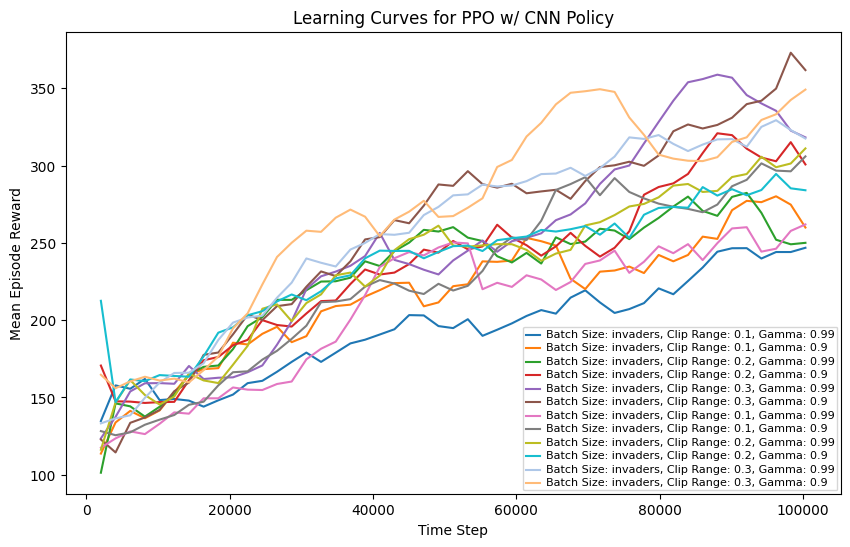

In [25]:

log_dir = 'ppo_cnn_log'

filenames = ['PPO_CNN_space_invaders_128_0.1_0.99_1',
             'PPO_CNN_space_invaders_128_0.1_0.9_1',
             'PPO_CNN_space_invaders_128_0.2_0.99_1',
             'PPO_CNN_space_invaders_128_0.2_0.9_1',
             'PPO_CNN_space_invaders_128_0.3_0.99_1',
             'PPO_CNN_space_invaders_128_0.3_0.9_1',
             'PPO_CNN_space_invaders_256_0.1_0.99_1',
             'PPO_CNN_space_invaders_256_0.1_0.9_1',
             'PPO_CNN_space_invaders_256_0.2_0.99_1',
             'PPO_CNN_space_invaders_256_0.2_0.9_1',
             'PPO_CNN_space_invaders_256_0.3_0.99_1',
             'PPO_CNN_space_invaders_256_0.3_0.9_1']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Plot the learning curves for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.title('Learning Curves for PPO w/ CNN Policy')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

for i, filename in enumerate(filenames):
    parts = filename.split('_')
    batch_size = parts[3]
    clip_range = parts[5]
    gamma = parts[6]

    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
    step = [episode.step for episode in episode_rewards]
    reward = [episode.value for episode in episode_rewards]

    label = f"Batch Size: {batch_size}, Clip Range: {clip_range}, Gamma: {gamma}"
    plt.plot(step, reward, label=label, color=colors[i])

legend = plt.legend(loc='lower right', prop={'size': 5})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()


## Plot: Loss function as time steps increase.

The loss function can help us understand how the algorithm learns as it represents the objective function the algorithm is trying to minimize. We can observe that, especially for higher learning rates, the algorithm encounters rapid fluctuations or spikes indicating that the model may be struggling to adapt to certain states.

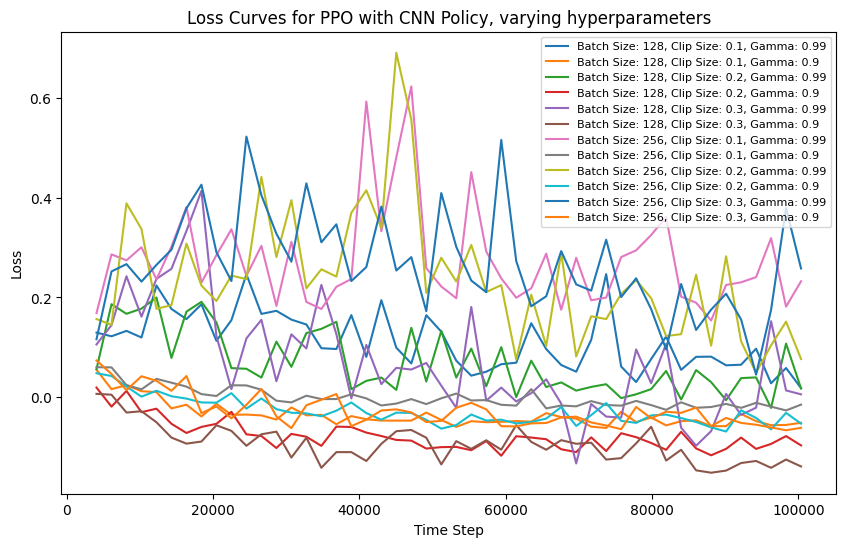

In [27]:
import matplotlib.pyplot as plt

log_dir = 'ppo_cnn_log'

filenames = ['PPO_CNN_space_invaders_128_0.1_0.99_1',
             'PPO_CNN_space_invaders_128_0.1_0.9_1',
             'PPO_CNN_space_invaders_128_0.2_0.99_1',
             'PPO_CNN_space_invaders_128_0.2_0.9_1',
             'PPO_CNN_space_invaders_128_0.3_0.99_1',
             'PPO_CNN_space_invaders_128_0.3_0.9_1',
             'PPO_CNN_space_invaders_256_0.1_0.99_1',
             'PPO_CNN_space_invaders_256_0.1_0.9_1',
             'PPO_CNN_space_invaders_256_0.2_0.99_1',
             'PPO_CNN_space_invaders_256_0.2_0.9_1',
             'PPO_CNN_space_invaders_256_0.3_0.99_1',
             'PPO_CNN_space_invaders_256_0.3_0.9_1']

# Plot the loss curves for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.title('Loss Curves for PPO with CNN Policy, varying hyperparameters')
plt.xlabel('Time Step')
plt.ylabel('Loss')

losses = []

for filename in filenames:
    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_losses = event_acc.Scalars('train/loss')  # training losses
    step = [episode.step for episode in episode_losses]
    loss = [episode.value for episode in episode_losses]

    losses.append(loss)

    split_filename = filename.split('_')
    batch_size = split_filename[4]
    clip_size = split_filename[5]
    gamma = split_filename[6]


    label = f"Batch Size: {batch_size}, Clip Size: {clip_size}, Gamma: {gamma}"
    plt.plot(step, loss, label=label)

legend = plt.legend(loc='upper right', prop={'size': 8})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()


# Appendix

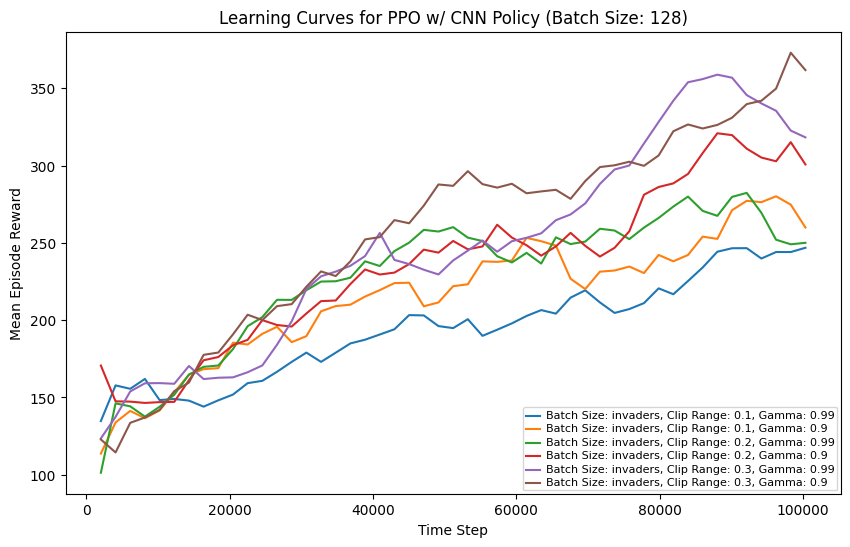

In [28]:
import matplotlib.pyplot as plt

log_dir = 'ppo_cnn_log'

filenames = ['PPO_CNN_space_invaders_128_0.1_0.99_1',
             'PPO_CNN_space_invaders_128_0.1_0.9_1',
             'PPO_CNN_space_invaders_128_0.2_0.99_1',
             'PPO_CNN_space_invaders_128_0.2_0.9_1',
             'PPO_CNN_space_invaders_128_0.3_0.99_1',
             'PPO_CNN_space_invaders_128_0.3_0.9_1']

# Define a list of colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Plot the learning curves for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.title('Learning Curves for PPO w/ CNN Policy (Batch Size: 128)')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

for i, filename in enumerate(filenames):
    parts = filename.split('_')
    batch_size = parts[3]
    clip_range = parts[5]
    gamma = parts[6]

    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
    step = [episode.step for episode in episode_rewards]
    reward = [episode.value for episode in episode_rewards]

    label = f"Batch Size: {batch_size}, Clip Range: {clip_range}, Gamma: {gamma}"
    plt.plot(step, reward, label=label, color=colors[i])

legend = plt.legend(loc='lower right', prop={'size': 5})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()


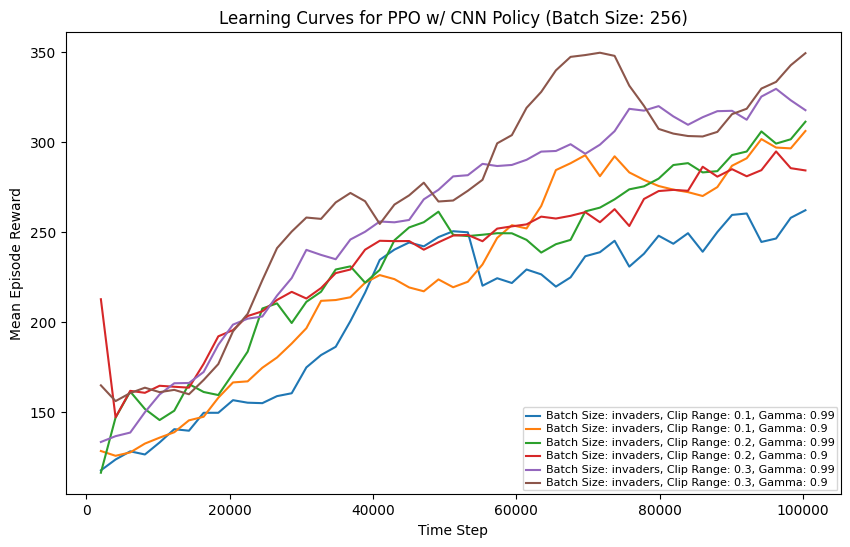

In [29]:
import matplotlib.pyplot as plt

log_dir = 'ppo_cnn_log'

filenames = [
             'PPO_CNN_space_invaders_256_0.1_0.99_1',
             'PPO_CNN_space_invaders_256_0.1_0.9_1',
             'PPO_CNN_space_invaders_256_0.2_0.99_1',
             'PPO_CNN_space_invaders_256_0.2_0.9_1',
             'PPO_CNN_space_invaders_256_0.3_0.99_1',
             'PPO_CNN_space_invaders_256_0.3_0.9_1']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Plot the learning curves for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.title('Learning Curves for PPO w/ CNN Policy (Batch Size: 256)')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

for i, filename in enumerate(filenames):
    parts = filename.split('_')
    batch_size = parts[3]
    clip_range = parts[5]
    gamma = parts[6]

    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
    step = [episode.step for episode in episode_rewards]
    reward = [episode.value for episode in episode_rewards]

    label = f"Batch Size: {batch_size}, Clip Range: {clip_range}, Gamma: {gamma}"
    plt.plot(step, reward, label=label, color=colors[i])

legend = plt.legend(loc='lower right', prop={'size': 5})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()
